# Make the graphs for paper
# OOV rate, ## rate by models

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [75]:
df = pd.read_csv('results/total_result.csv')
print(len(df))

4004830


In [79]:
df.head()

,index,source,tokenizer,tokenize_result,source_len,tokenized_len,OOV_per_tokenized_sent,OOV_count,OOV_per_source_sent,##_per_tokenized_sent,##_count,##_per_source_sent,task
0,0,높은 달이 떴다.,eojeol_composed_F_64k,높은 달이 떴다.,3,3,0.0,0,0.0,0.0,0,0.0,cola
1,1,높은 달이 떴다.,eojeol_pure_F_64k,높은 달이 떴다.,3,3,0.0,0,0.0,0.0,0,0.0,cola
2,2,높은 달이 떴다.,fixed_composed_F_64k,높 은 달 이 뜨 었 다 .,3,8,0.0,0,0.0,0.0,0,0.0,cola
3,3,높은 달이 떴다.,fixed_lexical_F_64k,높 은 달 이 뜨 었 다 .,3,8,0.0,0,0.0,0.0,0,0.0,cola
4,4,높은 달이 떴다.,fixed_pure_F_64k,높 은 달 이 뜨 었 다 .,3,8,0.0,0,0.0,0.0,0,0.0,cola


In [76]:
df['tokenizer'].unique()

array(['eojeol_composed_F_64k', 'eojeol_pure_F_64k',
       'fixed_composed_F_64k', 'fixed_lexical_F_64k', 'fixed_pure_F_64k',
       'eojeol_composed_F_32k', 'eojeol_pure_F_32k',
       'fixed_composed_F_32k', 'fixed_lexical_F_32k', 'fixed_pure_F_32k',
       nan], dtype=object)

In [77]:
df['task'].unique()

array(['cola', 'dp', 'hsd', 'nli', 'nsmc', 'paws'], dtype=object)

In [82]:
df.isna().sum()

index                       0
source                      0
tokenizer                 430
tokenize_result           430
source_len                  0
tokenized_len               0
OOV_per_tokenized_sent      0
OOV_count                   0
OOV_per_source_sent         0
##_per_tokenized_sent       0
##_count                    0
##_per_source_sent          0
task                        0
dtype: int64

In [84]:
df = df[df['tokenizer'].isna() == False] 
len(df)

4004400

In [85]:
# tokenizer명 수정
model_name = {'eojeol_composed_F':'WP',
              'eojeol_pure_F':'WP-SD',
              'fixed_composed_F':'MorWP',
              'fixed_pure_F':'MorWP-SD',
              'fixed_lexical_F':'MorWP-MD'
              }
task_name = {'cola':'NIKL_CoLA',
              'dp':'KLUE-DP',
              'hsd':'HSD',
              'nli':'KLUE-NLI',
              'nsmc':'NSMC',
              'paws':'PAWS-X'}


df['model'] = df['tokenizer'].apply(lambda x: re.sub('_\d\dk', '', x))
df['model'] = df['model'].apply(lambda x: model_name[x])
df['task'] = df['task'].apply(lambda x: task_name[x])
df['vocab_size'] = df['tokenizer'].apply(lambda x: '32K' if '32' in x else '64K')
df['##_per_tokenized_sent'] = df['##_per_tokenized_sent'].apply(lambda x: float(x))
df.head()

,index,source,tokenizer,tokenize_result,source_len,tokenized_len,OOV_per_tokenized_sent,OOV_count,OOV_per_source_sent,##_per_tokenized_sent,##_count,##_per_source_sent,task,model,vocab_size
0,0,높은 달이 떴다.,eojeol_composed_F_64k,높은 달이 떴다.,3,3,0.0,0,0.0,0.0,0,0.0,NIKL_CoLA,WP,64K
1,1,높은 달이 떴다.,eojeol_pure_F_64k,높은 달이 떴다.,3,3,0.0,0,0.0,0.0,0,0.0,NIKL_CoLA,WP-SD,64K
2,2,높은 달이 떴다.,fixed_composed_F_64k,높 은 달 이 뜨 었 다 .,3,8,0.0,0,0.0,0.0,0,0.0,NIKL_CoLA,MorWP,64K
3,3,높은 달이 떴다.,fixed_lexical_F_64k,높 은 달 이 뜨 었 다 .,3,8,0.0,0,0.0,0.0,0,0.0,NIKL_CoLA,MorWP-MD,64K
4,4,높은 달이 떴다.,fixed_pure_F_64k,높 은 달 이 뜨 었 다 .,3,8,0.0,0,0.0,0.0,0,0.0,NIKL_CoLA,MorWP-SD,64K


In [469]:
# x_order = ['WP', 'WP-SD', 'MorWP', 'MorWP-SD', 'MorWP-MD']
# subplot_order = ['KLUE-NLI', 'PAWS-X', 'NIKL_CoLA', 'KLUE-DP', 'NSMC', 'HSD']

# g = sns.catplot(data=df,
#                    x='model',
#                   y='OOV_per_tokenized_sent',
#                   col='task',
#                   hue='vocab_size',
#                    col_wrap=6,
#                    order=x_order,
#                     col_order = subplot_order,
#                    kind='bar',
#                   legend=False,
#                 palette='colorblind',
#                    size=5, aspect=1)
# # get datapoints
# for i in range(6):
#     ax = g.facet_axis(0,i)
#     for p in ax.patches:
#         ax.text(p.get_x() + 0.015, 
#                 p.get_height() * 1.02, 
#                 '{0:.2f}'.format(p.get_height()), 
#                 color='black', rotation='horizontal', size='large')


# g.set(ylim=(0.0, 1.0))
# g.set(ylabel='OOV rate per sentence(%)')
# g.set(xlabel='Model')
# plt.legend(loc='best')
# plt.show()
# g.savefig('OOV_token_rate.png')

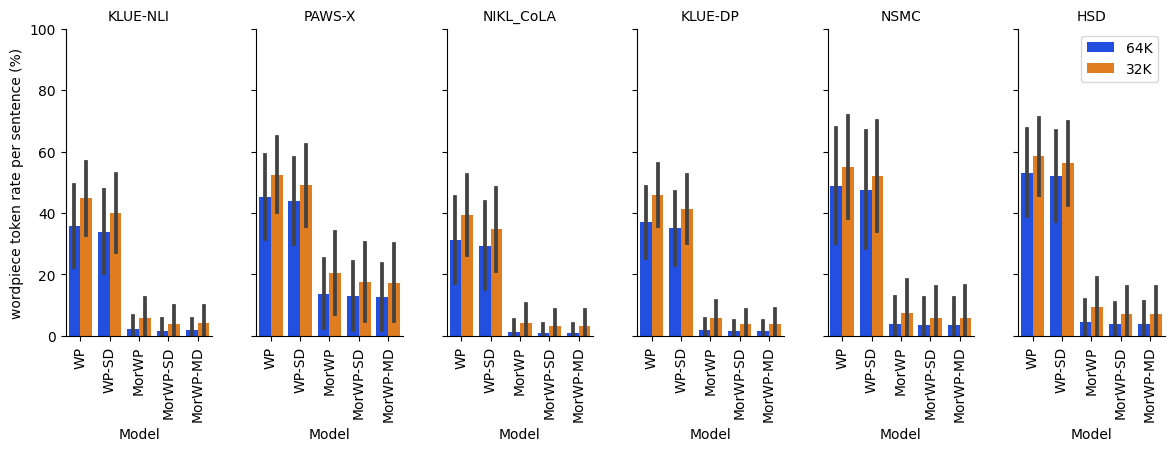

In [90]:
x_order = ['WP', 'WP-SD', 'MorWP', 'MorWP-SD', 'MorWP-MD']
subplot_order = ['KLUE-NLI', 'PAWS-X', 'NIKL_CoLA', 'KLUE-DP', 'NSMC', 'HSD']

with sns.plotting_context(font_scale=100):
    g = sns.catplot(data=df,
                       x='model',
                      y='##_per_tokenized_sent',
                      col='task',
                      hue='vocab_size',
                      errorbar='sd',
                       col_wrap=6,
                       order=x_order,
                        col_order = subplot_order,
                       kind='bar',
                      legend=False,
                    palette='bright',
                    height=4,
                    aspect=0.5)
# get datapoints
# for i in range(6):
#     ax = g.facet_axis(0,i)
#     for p in ax.patches:
#         ax.text(p.get_x() + 0.1, 
#                 p.get_height() * 1.02, 
#                 '{0:.1f}'.format(p.get_height()),
#                 color='red', rotation='horizontal', size=7)

g.set(ylim=(0.0, 100.0))
g.set(ylabel='wordpiece token rate per sentence (%)')
g.set_titles("{col_name}")
g.set(xlabel='Model')
g.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.rc('font', size=15)
plt.legend(loc='best')
plt.show()
g.savefig('wordpiece_token_rate.png')

# table

In [91]:
df_32k = df[df['vocab_size']=='32K']
df_64k = df[df['vocab_size']=='64K']

In [92]:
df.groupby(['vocab_size', 'model']).mean()[['OOV rate', '## rate', 'tokenized_len']]

In [377]:
df_64k.groupby(['task','model']).mean()[['OOV rate', '## rate']].T

task        HSD                                   KLUE-DP                    \
model     MorWP MorWP-MD MorWP-SD      WP   WP-SD   MorWP MorWP-MD MorWP-SD   
OOV rate  0.524    0.525    0.524   0.520   0.524   1.046    1.051    1.051   
## rate   4.110    3.683    3.629  54.471  53.544   2.266    1.815    1.795   

task                      ...   NSMC                                    \
model         WP   WP-SD  ...  MorWP MorWP-MD MorWP-SD      WP   WP-SD   
OOV rate   1.298   1.338  ...  0.254    0.248    0.248   0.287   0.321   
## rate   38.289  36.389  ...  3.715    3.492    3.453  51.554  50.262   

task      PAWS-X                                    
model      MorWP MorWP-MD MorWP-SD      WP   WP-SD  
OOV rate   1.522    1.544    0.908   1.797   1.088  
## rate   14.946   13.716   14.016  47.929  46.615  

[2 rows x 30 columns]